In [30]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [286]:
#RNN example:
#input: cos(theta), sin(theta)
#learn: output single parameter theta
#20 neurons, ReLU non-linearity
class network1():
    def forward(w,w_out,theta,dt,tau):
        #theta: 100 random angles
        I1=(torch.cos(theta)*torch.ones(3200,30)).T
        I2=(torch.sin(theta)*torch.ones(3200,30)).T
        I = torch.cat((I1,I2))
        x = torch.rand((60,3200))
        for i in range(800):
            x = x + 1/tau*(-x+m(torch.matmul(w,x)+I))*dt
        theta_e = torch.matmul(w_out,x)
        theta_e = (torch.abs(theta_e) + theta_e)/2
        L = torch.sum((theta_e-theta.reshape(1,3200))**2)/800
        return L

In [260]:
w = torch.autograd.Variable(-torch.eye(60)*(torch.rand(60)-0.05),requires_grad = True)
w_out = torch.autograd.Variable(torch.randn(1,60),requires_grad = True)

In [287]:
dt = 0.01
tau = 0.2

optimizer = torch.optim.SGD([w,w_out], 0.0002)
m = torch.nn.ReLU()

loss_list = []
for i in range(50):
    theta = torch.rand((3200,1))*torch.pi/2
    optimizer.zero_grad()
    L = network1.forward(w,w_out,theta,dt,tau)
    L1 = L.detach().numpy().copy()
    L.backward()
    optimizer.step()
    loss_list.append(L1)

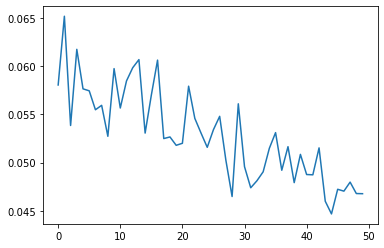

In [288]:
print(plt.plot(np.array(loss_list)))

In [331]:
theta = torch.rand((600,1))*torch.pi/8+torch.pi/4
I1=(torch.cos(theta)*torch.ones(600,30)).T
I2=(torch.sin(theta)*torch.ones(600,30)).T
I = torch.cat((I1,I2))
x = torch.randn((60,600))
x_l = []
for i in range(800):
    x = x + 1/tau*(-x+m(torch.matmul(w,x)+I))*dt
    x_a = x.detach().numpy().copy()
    x_l.append(x_a)
theta_e = torch.matmul(w_out,x)

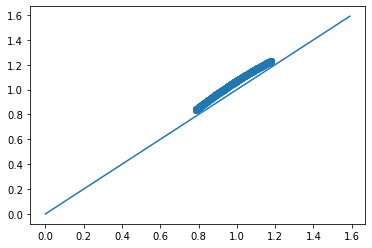

In [332]:
plt.scatter(theta.detach().numpy().reshape(-1),theta_e.detach().numpy().reshape(-1))
plt.plot(np.arange(0,1.6,0.01),np.arange(0,1.6,0.01))

In [303]:
x_l = np.array(x_l)
tra = np.zeros((60,600*800))
for i in range(60):
    tra[i,:] = x_l[:,i,:].reshape(-1)

In [333]:
u,v = np.linalg.eig(np.matmul(tra,tra.T))
reduced_dir = v[:,:2]
reduced_dir.shape

(60, 2)

In [334]:
low_dim_dyn = np.matmul(reduced_dir.T,tra)

In [345]:
theta = torch.rand((200,1))*torch.pi/8+torch.pi/4
I1=(torch.cos(theta)*torch.ones(200,30)).T
I2=(torch.sin(theta)*torch.ones(200,30)).T
I = torch.cat((I1,I2))
x = torch.randn((60,200))
x_l = []
for i in range(800):
    x = x + 1/tau*(-x+m(torch.matmul(w,x)+I))*dt
    x_a = np.matmul(x.detach().numpy().copy().T,reduced_dir)
    x_l.append(x_a)

In [346]:
x_l = np.array(x_l)

In [347]:
x_l.shape

(800, 200, 2)

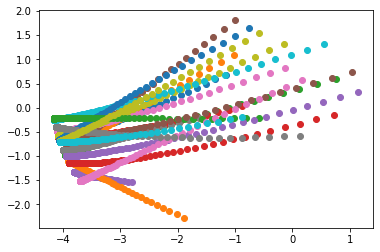

In [350]:
for i in range(20):
    plt.scatter(x_l[:,i,0],x_l[:,i,1])